# Week 04: Inference with Python 
Course-WMASDS04: Introduction to Data Science with Python
<br>Instructor: Farhana Afrin, Department of Statistics, JU


#### Objectives:
- Hypothesis Testing
    * One Population Mean Test
    * Difference in Population Means
    - t-statistic
    - p-value

### Required Dataset:
1. Cartwheeldata.csv
2. nhanes_2015_2016.csv

In [35]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
# import scipy.stats.distributions as dist

### One Population Mean

#### Research Question 

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

**Population**: All adults  
<br>**Parameter of Interest**: $\mu$, population mean cartwheel distance.
### Step-01: Define Null and Alternative Hypothesis
**Null Hypothesis: &emsp; $\;\;$ $ H_0$: The average cartwheel distance (in inches) for adults is not more than 80 inches.**
<br>**Alternative Hypthosis:$H_1:$ The average cartwheel distance (in inches) for adults more than 80 inches.**
<br>or, in other way,
<br>**$H_0: \mu$ = 80**
<br>**$H_1: \mu$ > 80**

### Step-02: Choose the Level of Significance
$\alpha\$ = 5%

### Step-03: Define Test statistic under $H_0$
$$t = \frac{Best\ Estimate - Hypothesized\ Value}{Standard\ Error\ of\ Estimate}$$ 
 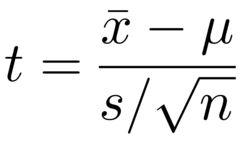


### Step-4: Define the Decision Rule: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

25 Adults, <br>the degree of freedom = 25 - 1 = 24, <br>level of significance = 0.05
<br>Tabulated value for t = 

#### Tabulated Value for t-statistic with 24 degrees of freedom at 5% level of significance

In [45]:
from scipy.stats import t
t.ppf(0.95, 24, loc=0, scale=1)

1.7108820799094275

**Decision Rule:** Reject null hypothesis if the calcuated value of the test statistic (t_calc) is greater that the tabulated value of t .<br> That is **Reject $H_0: \mu\ = 80$, if $t$_calc $>$ 1.711**

### Calculation

In [28]:
df = pd.read_csv("Cartwheeldata.csv")
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


## Method-1 and Method -2
- based on critical t-value
- based on estimated p-value

In [38]:
n = len(df)
mu = 80
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
(n, mean, sd)

(25, 82.48, 15.058552387264855)

In [43]:
t_calc,p_value=stats.ttest_1samp(df["CWDistance"],mu, alternative = 'greater')
# z_calc,p_value = sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

In [44]:
print('t value is =',t_calc,'\n', 'p value is = ',p_value)

t value is = 0.8234523266982029 
 p value is =  0.20917933285338536


**Decision based on Critical Value:** We fail to reject the null hypothesis at 5% level of significance, since the calculated value of t-statistic is not greater than tabulated t value.

**Decision based on p-value:** We fail to reject the null hypothesis, since the p-value is greater than the defined level of significance 0.05.

## Method-3
- based on CI

CI : https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.tconfint_mean.html

In [70]:
import statsmodels.api as sm
# female_bmi = da.loc[da.Gender=="Female", "BMI"].dropna()
sm.stats.DescrStatsW(df["CWDistance"]).tconfint_mean(alpha = 0.05, alternative = 'larger')

(77.32731851425025, inf)

**Decision based on CI:** We fail to reject null hypothesis at 5% level of significance, since the confidence interval contains the value in null hypothesis.
***

## Step-05: Final Conclusion
**Final Conclusion:** 
Since based on the sample evidence, we cannot reject the null hypothesis at 5% level of significance, we conclude that the average cartwheel distance (in inches) for adults is **not more than 80 inches**. 

***
***

# Difference in Population Means

#### Research Question 

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [72]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [73]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [74]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [75]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [87]:
import statsmodels.api as sm

z_value, p_value = sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())
z_value, p_value

(6.1755933531383205, 6.591544431126401e-10)

### using scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [86]:
from scipy import stats

stats.ttest_ind(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(), equal_var=True)

Ttest_indResult(statistic=6.1755933531383205, pvalue=7.050275578094527e-10)